In [13]:
import json
import os
import re

import matplotlib
from matplotlib import pyplot as plt
import pandas as pd


In [14]:
results_dicts = []

for file in os.listdir("results"):
    with open(os.path.join("results", file)) as f:
        results = json.load(f)

    top_level_results  = {k:v for k,v in results.items() if k in ["precision", "recall", "f1"]}
    parsed = re.fullmatch(r"(?P<dataset>.*?)_(?P<model>.*?)_(?P<modality>.*?)_results.json", file)
    if not parsed:
        continue
    results_dicts.append({**parsed.groupdict(), **top_level_results})

top_level_df = pd.DataFrame(results_dicts)

# working_df = top_level_df.copy()
# for i in range(7):
#     tld2 = top_level_df.copy()
#     tld2["model"] = f"claude{i+1}"
#     working_df = pd.concat([working_df, tld2])
# top_level_df = working_df

grouped_top_results = top_level_df.groupby(["dataset", "model", "modality"]).mean()
top_level_df = top_level_df.sort_values(["dataset", "model", "modality"], ascending=False)
top_level_df


,dataset,model,modality,precision,recall,f1
1,zeolite,qwen2.5VL-72,pdf,0.028855,0.739274,0.055542
6,zeolite,molmo,pdf,0.005239,0.316239,0.010308
5,zeolite,llama3.3-70,xml,0.011884,0.592344,0.023301
0,zeolite,gpt4o,xml,0.013382,0.717274,0.026274
2,zeolite,gpt4o,pdf,0.026975,0.727520,0.052021
12,zeolite,claude,xml,0.204062,0.937928,0.335197
9,zeolite,claude,pdf,0.168770,0.766110,0.276605
7,aluminum,qwen2.5VL-72,pdf,0.000996,0.860806,0.001989
3,aluminum,molmo,pdf,0.000422,0.536842,0.000843
4,aluminum,llama3.3-70,xml,0.000465,0.901502,0.000930


In [15]:
print(grouped_top_results.to_latex(float_format="%.3f"))

\begin{tabular}{lllrrr}
\toprule
 &  &  & precision & recall & f1 \\
dataset & model & modality &  &  &  \\
\midrule
\multirow[t]{7}{*}{aluminum} & \multirow[t]{2}{*}{claude} & pdf & 0.044 & 1.000 & 0.084 \\
 &  & xml & 0.058 & 0.911 & 0.108 \\
\cline{2-6}
 & \multirow[t]{2}{*}{gpt4o} & pdf & 0.002 & 0.499 & 0.003 \\
 &  & xml & 0.002 & 0.482 & 0.003 \\
\cline{2-6}
 & llama3.3-70 & xml & 0.000 & 0.902 & 0.001 \\
\cline{2-6}
 & molmo & pdf & 0.000 & 0.537 & 0.001 \\
\cline{2-6}
 & qwen2.5VL-72 & pdf & 0.001 & 0.861 & 0.002 \\
\cline{1-6} \cline{2-6}
\multirow[t]{7}{*}{zeolite} & \multirow[t]{2}{*}{claude} & pdf & 0.169 & 0.766 & 0.277 \\
 &  & xml & 0.204 & 0.938 & 0.335 \\
\cline{2-6}
 & \multirow[t]{2}{*}{gpt4o} & pdf & 0.027 & 0.728 & 0.052 \\
 &  & xml & 0.013 & 0.717 & 0.026 \\
\cline{2-6}
 & llama3.3-70 & xml & 0.012 & 0.592 & 0.023 \\
\cline{2-6}
 & molmo & pdf & 0.005 & 0.316 & 0.010 \\
\cline{2-6}
 & qwen2.5VL-72 & pdf & 0.029 & 0.739 & 0.056 \\
\cline{1-6} \cline{2-6}
\bottomr

In [16]:
models = top_level_df["model"].unique()
datasets = top_level_df["dataset"].unique()
modalities = top_level_df["modality"].unique()

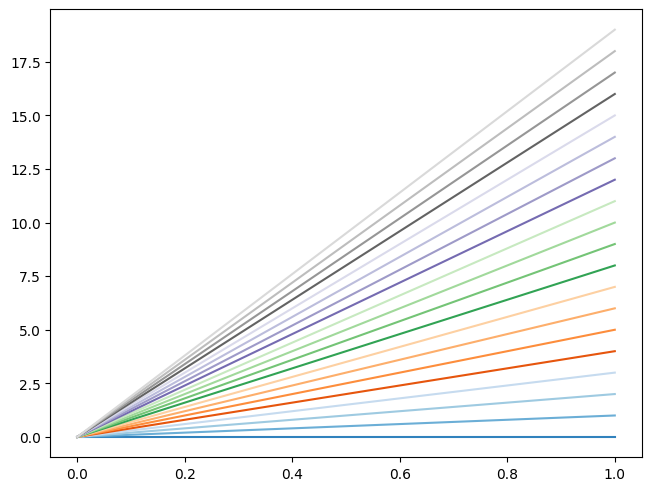

In [17]:

fig, ax1 = plt.subplots(layout='constrained')

tab20 = matplotlib.colormaps["tab20c"]
colors = tab20.colors

for i, color in enumerate(colors):
    ax1.plot([0, i], color=color)

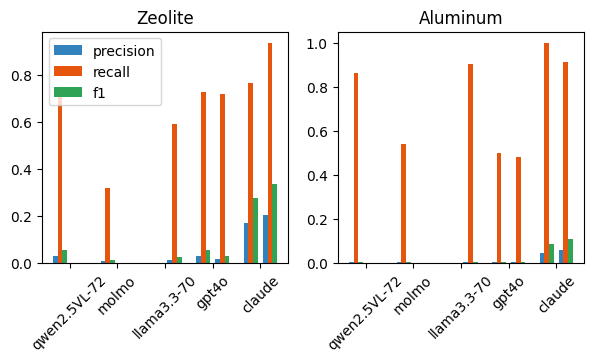

In [18]:
fig, axes = plt.subplots(1,2, figsize=(7,3))

barwidth=0.5

axes[0].set_title("Zeolite")
axes[1].set_title("Aluminum")


for (ax, dataset) in zip(axes, datasets):
    centers = []
    ax_labels = []
    for center, model in  enumerate(models):
        center = 10 * barwidth * center
        centers.append(center + 3 * barwidth)
        for offset, modality in enumerate(modalities):
            if (dataset, model, modality) not in grouped_top_results.index:
                continue
            offset = offset * 4 * barwidth
            ax.bar(x=center + offset, height=grouped_top_results.loc[dataset, model, modality]["precision"].mean(), width=barwidth, color=colors[0], label="precision" if offset == 0 and center == 0 else None)
            ax.bar(x=center + offset + barwidth, height=grouped_top_results.loc[dataset, model, modality]["recall"].mean(), width=barwidth, color=colors[4], label="recall" if offset == 0 and center == 0 else None)
            ax.bar(x=center + offset + 2 * barwidth , height=grouped_top_results.loc[dataset, model, modality]["f1"].mean(), width=barwidth, label="f1" if offset == 0  and center == 0 else None, color=colors[8],)
    ax.set_xticks(centers)
    ax.set_xticklabels(models, rotation=45)
axes[0].legend(loc="upper left")

In [19]:
grouped_top_results.loc[dataset, model, modality][["precision", "recall", "f1"]]

precision    0.057527
recall       0.910865
f1           0.108219
Name: (aluminum, claude, xml), dtype: float64

## Location Results

In [20]:
LOCATIONS = ["Page Text", "Table Column", "Table Header", "Table Cell", "Footnote", "Table Caption"]

In [21]:
with open("results/zeolite_claude_pdf_results.json") as f:
    pdf_results = json.load(f)["scores_by_location"]

with open("results/zeolite_claude_xml_results.json") as f:
    xml_results = json.load(f)["scores_by_location"]

In [22]:
xml_results

{'Footnote': {'precision': 0.17131474103585656,
  'recall': 1.0,
  'f1': 0.292517006802721},
 'Not Present': {'precision': None, 'recall': None, 'f1': None},
 'Page Text': {'precision': 0.1865561148948771,
  'recall': 0.9117221418234442,
  'f1': 0.3097345132743363},
 'Table Caption': {'precision': 0.5266666666666666,
  'recall': 1.0,
  'f1': 0.6899563318777292},
 'Table Cell': {'precision': 0.5, 'recall': 1.0, 'f1': 0.6666666666666666},
 'Table Column': {'precision': 0.36480293308890926,
  'recall': 0.9234338747099768,
  'f1': 0.5229960578186597},
 'Table Header': {'precision': 0.2571976967370441,
  'recall': 1.0,
  'f1': 0.4091603053435114}}

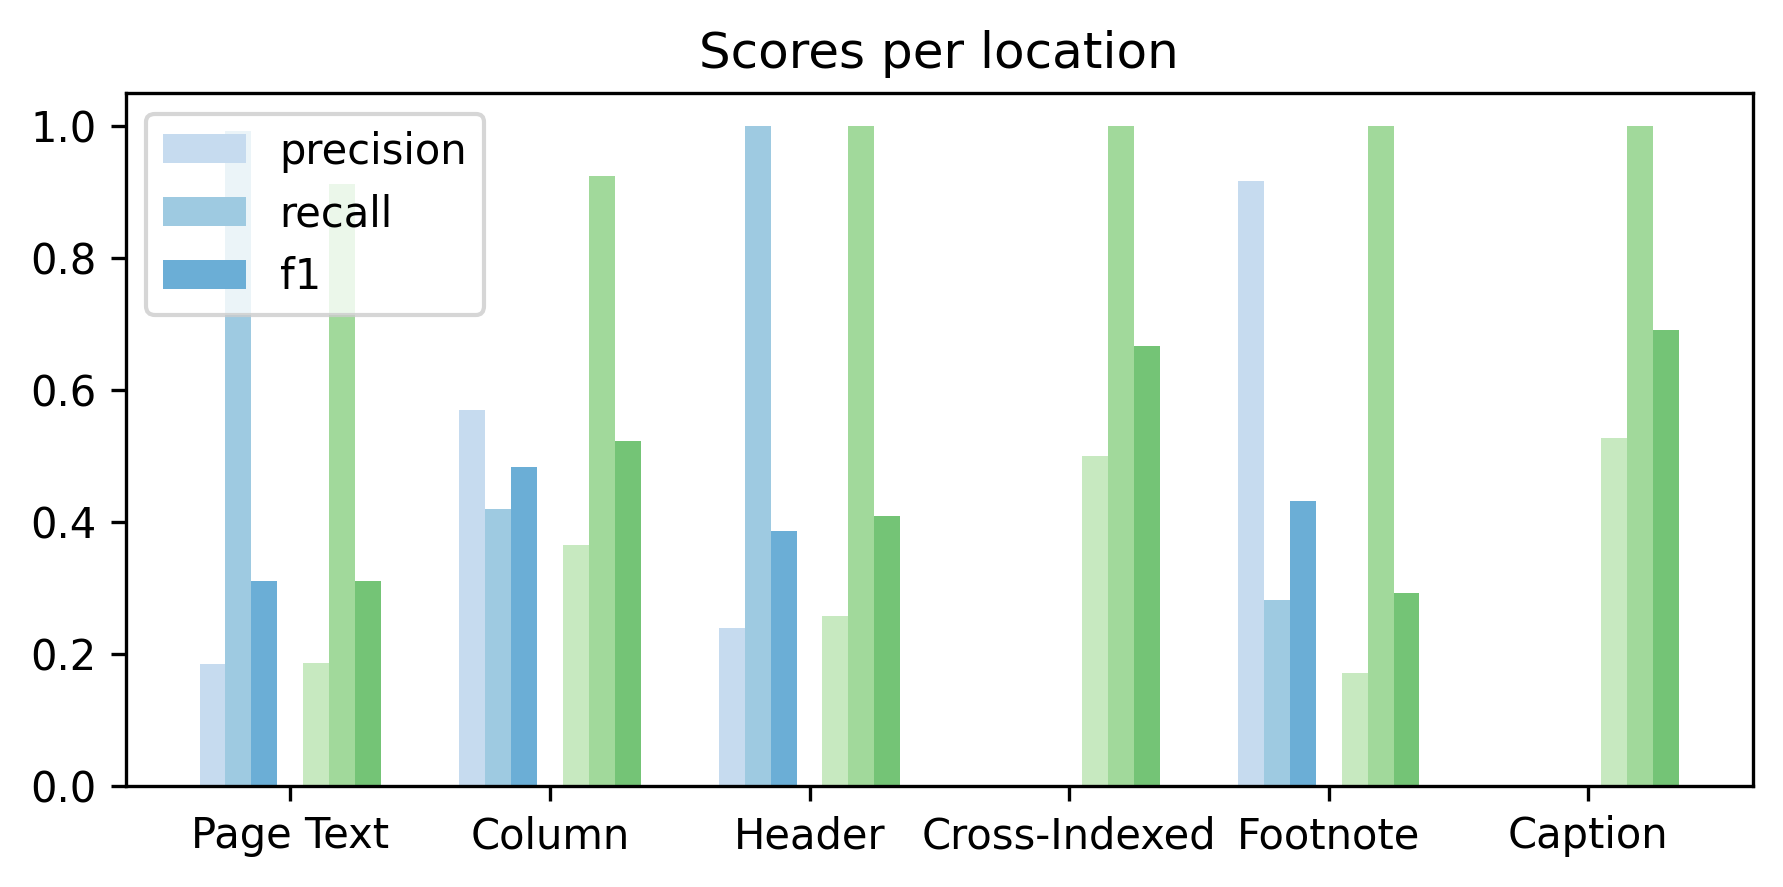

In [25]:
fig, ax = plt.subplots(figsize=(7,3), dpi=300)

width=1

locmap = {
    "Table Column": "Column",
    "Table Cell": "Cross-Indexed",
    "Table Caption": "Caption",
    "Table Header": "Header",
    "Footnote": "Footnote"
}

# for center, location in enumerate(LOCATIONS):
#     center = 4 * center
#     for offset, results in enumerate([pdf_results, xml_results]):

centers = []
for center, location in  enumerate(LOCATIONS):
    center = 10 * barwidth * center
    centers.append(center + 3 *barwidth)
    for offset, results in enumerate([pdf_results, xml_results]):
        if location not in results:
            continue
        c_offset = offset * 4 * barwidth

        is_first = center + offset == 0
        ax.bar(x=center + c_offset, height=results[location]["precision"], width=barwidth, color=colors[offset * 8 + 3], label="precision" if center == 0 and offset==0 else None)
        ax.bar(x=center + c_offset + barwidth, height=results[location]["recall"], width=barwidth, color=colors[offset * 8 + 2], label="recall" if offset == 0 and center == 0 else None)
        ax.bar(x=center + c_offset + 2 * barwidth , height=results[location]["f1"], width=barwidth, label="f1" if offset == 0  and center == 0 else None, color=colors[offset * 8 + 1],)
ax.set_xticks(centers)
ax.set_xticklabels([locmap.get(loc, loc) for loc in LOCATIONS])
ax.legend(loc="upper left")

ax.set_title('Scores per location')

fig.savefig("images/location_results.png")